  Using cached scikit_learn-1.2.0-cp311-cp311-macosx_10_9_x86_64.whl (9.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 879.5 kB/s eta 0:00:0000:0100:02
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score

In [4]:
df = pd.read_csv('cleaned_data_2')

In [3]:
df.drop('Unnamed: 0', axis =1, inplace=True)

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,1970-01-01 00:00:00.000002006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,1970-01-01 00:00:00.000002008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,1970-01-01 00:00:00.000002009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,1970-01-01 00:00:00.000002006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,1970-01-01 00:00:00.000002006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [8]:
df.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   object 
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 853.2+ KB


#### Distribution Check by Platform, Genre, and Developer

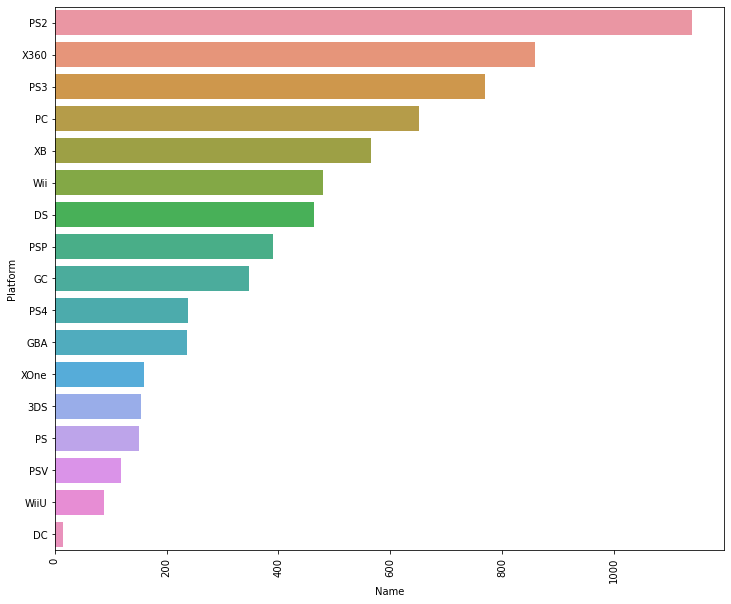

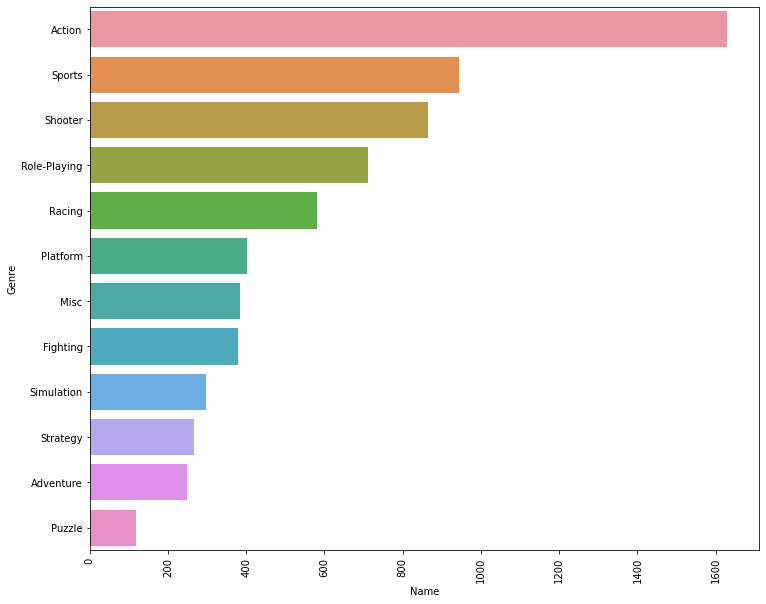

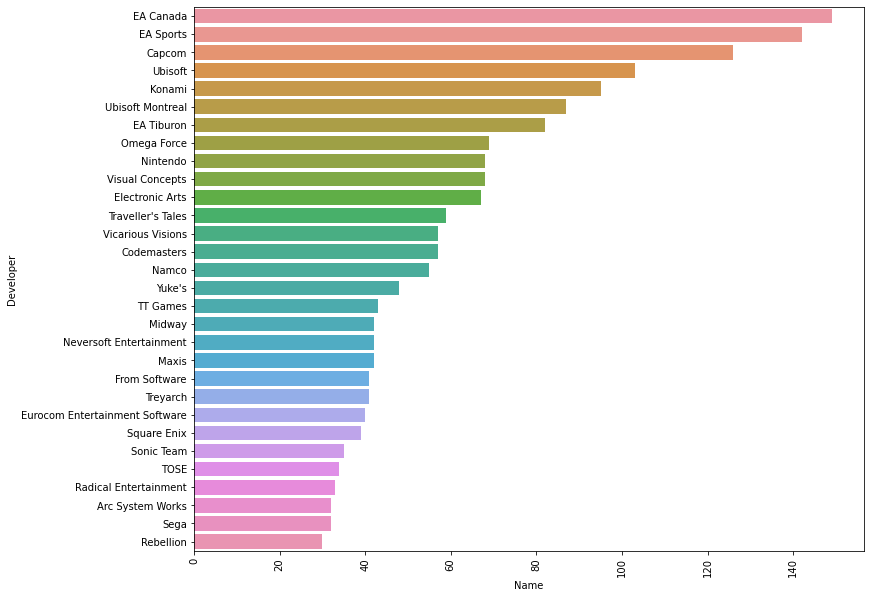

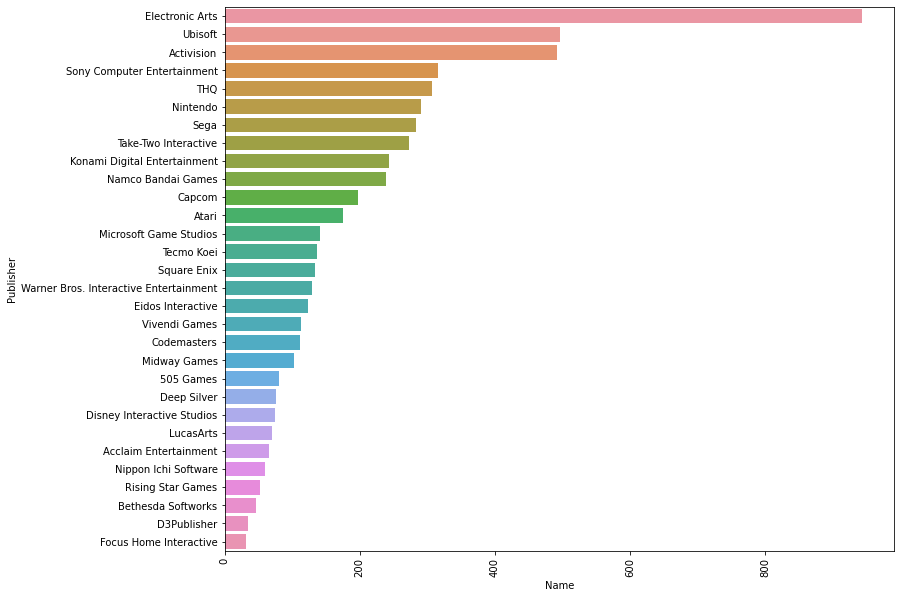

In [11]:
cols_to_use= ['Platform','Genre','Developer','Publisher']

for col in cols_to_use:
    plot = df[['Name', col]].groupby([col]).count().sort_values('Name',ascending=False).reset_index()
    plt.figure(figsize=(12,10))
    plt.xticks(rotation=90)
    sns.barplot(x='Name',y=col,data=plot[:30])

#### Critic Score Distribtution by Genre, Platform, and Developer

In [23]:
df['Score_class'] = pd.qcut(df['Critic_Score'], q=3, labels=['Low','Average','High'])
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Score_class
0,Wii Sports,Wii,1970-01-01 00:00:00.000002006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,Average
1,Mario Kart Wii,Wii,1970-01-01 00:00:00.000002008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,High
2,Wii Sports Resort,Wii,1970-01-01 00:00:00.000002009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,High
3,New Super Mario Bros.,DS,1970-01-01 00:00:00.000002006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,High
4,Wii Play,Wii,1970-01-01 00:00:00.000002006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,Low


In [50]:
in_top =df[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()[:15]
in_top

,Genre,Name
0,Action,1630
1,Sports,943
2,Shooter,864
3,Role-Playing,712
4,Racing,581
5,Platform,403
6,Misc,384
7,Fighting,378
8,Simulation,297
9,Strategy,267


#### Distribution of Sales by Genre

In [58]:
df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'], format="%m/%d/%Y %I:%M:%S %p")
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Score_class
0,Wii Sports,Wii,1970-01-01 00:00:00.000002006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,Average
1,Mario Kart Wii,Wii,1970-01-01 00:00:00.000002008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,High
2,Wii Sports Resort,Wii,1970-01-01 00:00:00.000002009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,High
3,New Super Mario Bros.,DS,1970-01-01 00:00:00.000002006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,High
4,Wii Play,Wii,1970-01-01 00:00:00.000002006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,E.T. The Extra-Terrestrial,GBA,1970-01-01 00:00:00.000002001,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E,Low
6821,Mortal Kombat: Deadly Alliance,GBA,1970-01-01 00:00:00.000002002,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M,High
6822,Metal Gear Solid V: Ground Zeroes,PC,1970-01-01 00:00:00.000002014,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M,High
6823,Breach,PC,1970-01-01 00:00:00.000002011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T,Low


#### OneHotEncoding Categorical Columns

In [6]:
from sklearn.preprocessing import OneHotEncoder
def Ohe(column):
    ohe = OneHotEncoder(handle_unknown='ignore')
    df[f'{column.name}'] = ohe.fit_transform(df[[f'{column.name}']]).toarray()
    globals()[f'df_{column.name}_categories'] = list(ohe.get_feature_names_out())
    
    print(f'Passing column ["{column.name}"]) through OneHotEncoder(): \n')
    
    for i in range(0, len(list(ohe.get_feature_names_out()))):
        print(f'Categorical Value {ohe.inverse_transform([i])} is replaced with value {[i]}')
    print(f'\n[df_{column.name}_categories] = ', globals() [f'df_{column.name}_categories'])

#### Dummy Label Encoding

In [1]:
from sklearn.preprocessing import LabelEncoder
def dummyEncode_column(column):
    le = LabelEncoder()
    df[f'{column.name}'] = le.fit_transform(df[f'{column.name}'])
    globals() [f'df_{column.name}_categories'] = list(le.classes_)
    
    print(f'After passing column ["{column.name}"] through LabelEncoder(): \n')
    
    for i in range(0,len(list(le.classes_))):
        print(f'Categorical value {le.inverse_transform([i])} is replaced with numerical value {[i]}')   
    
    print(f'\n[df_{column.name}_categories] = ', globals() [f'df_{column.name}_categories'])
    
    display(df)

ModuleNotFoundError: No module named 'sklearn'